In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import os
import sys
base_dir = os.path.join(os.getcwd(), os.pardir, os.pardir)
sys.path.append(base_dir)

# Models
import Models.LatentFactorModels 
import Simulators.Simulator 
import Models.ModelComparer 
import numpy as np
import sklearn

import pandas as pd
pd.set_option('max_rows', 15)
import seaborn as sns

# Assessment Machinery
eval_base_dir = os.path.join(base_dir, os.pardir, "CancerDimensionalityReduction")
sys.path.append(eval_base_dir)

import Performance.classification.CrossValidation 

# Logging
import logging
logging.basicConfig(stream=sys.stdout, level=logging.INFO)

/home/ijoseph/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
import datetime
start_time = datetime.datetime.now()
print "Starting at", start_time

Starting at 2016-11-06 15:56:41.623198


# Set Parameters

In [4]:
N = 1000
p_1, p_2 = int(2.5e4), int(2.5e4)
psiMean, wMean = (2,2)

# Simulate

In [5]:
(m, p_0, p_3) = (2,3,1)
genModel = Models.LatentFactorModels.ThreeNodeGaussianModel(m, p_0, p_1, p_2, p_3)

In [6]:
_ = genModel.initializeParameters(psiMean = psiMean, wMean=wMean, warm_start=False)
simulator = Simulators.Simulator.Simulator(genModel)

In [7]:
np.random.seed(seed=150)
genModel = simulator.simulate(int(N))

INFO:root:Simulating 1000 points with 23 processors
INFO:root:12 cpus do 43, 11 cpus do 44. Prepping models...
INFO:root:Done prepping models. Mapping...


[Parallel(n_jobs=23)]: Done  24 out of  23 | elapsed:  8.6min remaining:  -21.5s
[Parallel(n_jobs=23)]: Done  24 out of  23 | elapsed:  8.8min remaining:  -22.1s
[Parallel(n_jobs=23)]: Done  24 out of  23 | elapsed:  8.8min remaining:  -22.1s
[Parallel(n_jobs=23)]: Done  24 out of  23 | elapsed:  8.9min remaining:  -22.2s
[Parallel(n_jobs=23)]: Done  24 out of  23 | elapsed:  8.9min remaining:  -22.2s
[Parallel(n_jobs=23)]: Done  24 out of  23 | elapsed:  8.9min remaining:  -22.2s
[Parallel(n_jobs=23)]: Done  24 out of  23 | elapsed:  8.9min remaining:  -22.3s
[Parallel(n_jobs=23)]: Done  24 out of  23 | elapsed:  8.9min remaining:  -22.3s
[Parallel(n_jobs=23)]: Done  24 out of  23 | elapsed:  9.0min remaining:  -22.4s
[Parallel(n_jobs=23)]: Done  24 out of  23 | elapsed:  9.0min remaining:  -22.4s
[Parallel(n_jobs=23)]: Done  24 out of  23 | elapsed:  9.0min remaining:  -22.4s
[Parallel(n_jobs=23)]: Done  24 out of  23 | elapsed:  9.0min remaining:  -22.5s
[Parallel(n_jobs=23)]: Done 

Only takes a few minutes to save data into a feather like this. 

In [8]:
folder = "n_{0}_p_{1}_psi_{2}_W_{3}".format(N, p_1 + p_2 + p_3, psiMean, wMean)
print "saving in", folder

saving in n_1000_p_50001_psi_2_W_2


In [ ]:
genModel.save_data(folder)

# Cross Validation 

In [ ]:
dfc = Performance.classification.CrossValidation.DataFrameCollection(
    dependent_data=genModel.getY(), independent_data=genModel.getX())
print "N = {0}".format(dfc.independentDF.shape[0])

## MFAA

In [ ]:
cv_mfaa = Performance.classification.CrossValidation.CrossValidation(
    predictorClass=Models.LatentFactorModels.ThreeNodeGaussianModel(m, p_0, p_1, p_2, p_3),
                                                         dataFrameCollection=dfc,k =10)

cv_mfaa.cross_validate()
cv_mfaa.output_results()

mean accuracy score 0.77, standard error 0.04
INFO:root:All accuracy scores: [0.78000000000000003, 0.69999999999999996, 0.81000000000000005, 0.77000000000000002, 0.69999999999999996, 0.75, 0.79000000000000004, 0.81999999999999995, 0.76000000000000001, 0.78000000000000003]
mean sensitivity 0.76, standard error 0.05
INFO:root:All sensitivity scores: [0.80487804878048785, 0.68333333333333335, 0.81999999999999995, 0.78846153846153844, 0.75, 0.75510204081632648, 0.69565217391304346, 0.81034482758620685, 0.70588235294117652, 0.78723404255319152]
mean specificity 0.77, standard error 0.06
INFO:root:All specificity scores: [0.76271186440677963, 0.72499999999999998, 0.80000000000000004, 0.75, 0.63636363636363635, 0.74509803921568629, 0.87037037037037035, 0.83333333333333337, 0.81632653061224492, 0.77358490566037741]
mean precision 0.78, standard error 0.05
INFO:root:All precision scores: [0.7021276595744681, 0.78846153846153844, 0.80392156862745101, 0.77358490566037741, 0.72413793103448276, 0.7

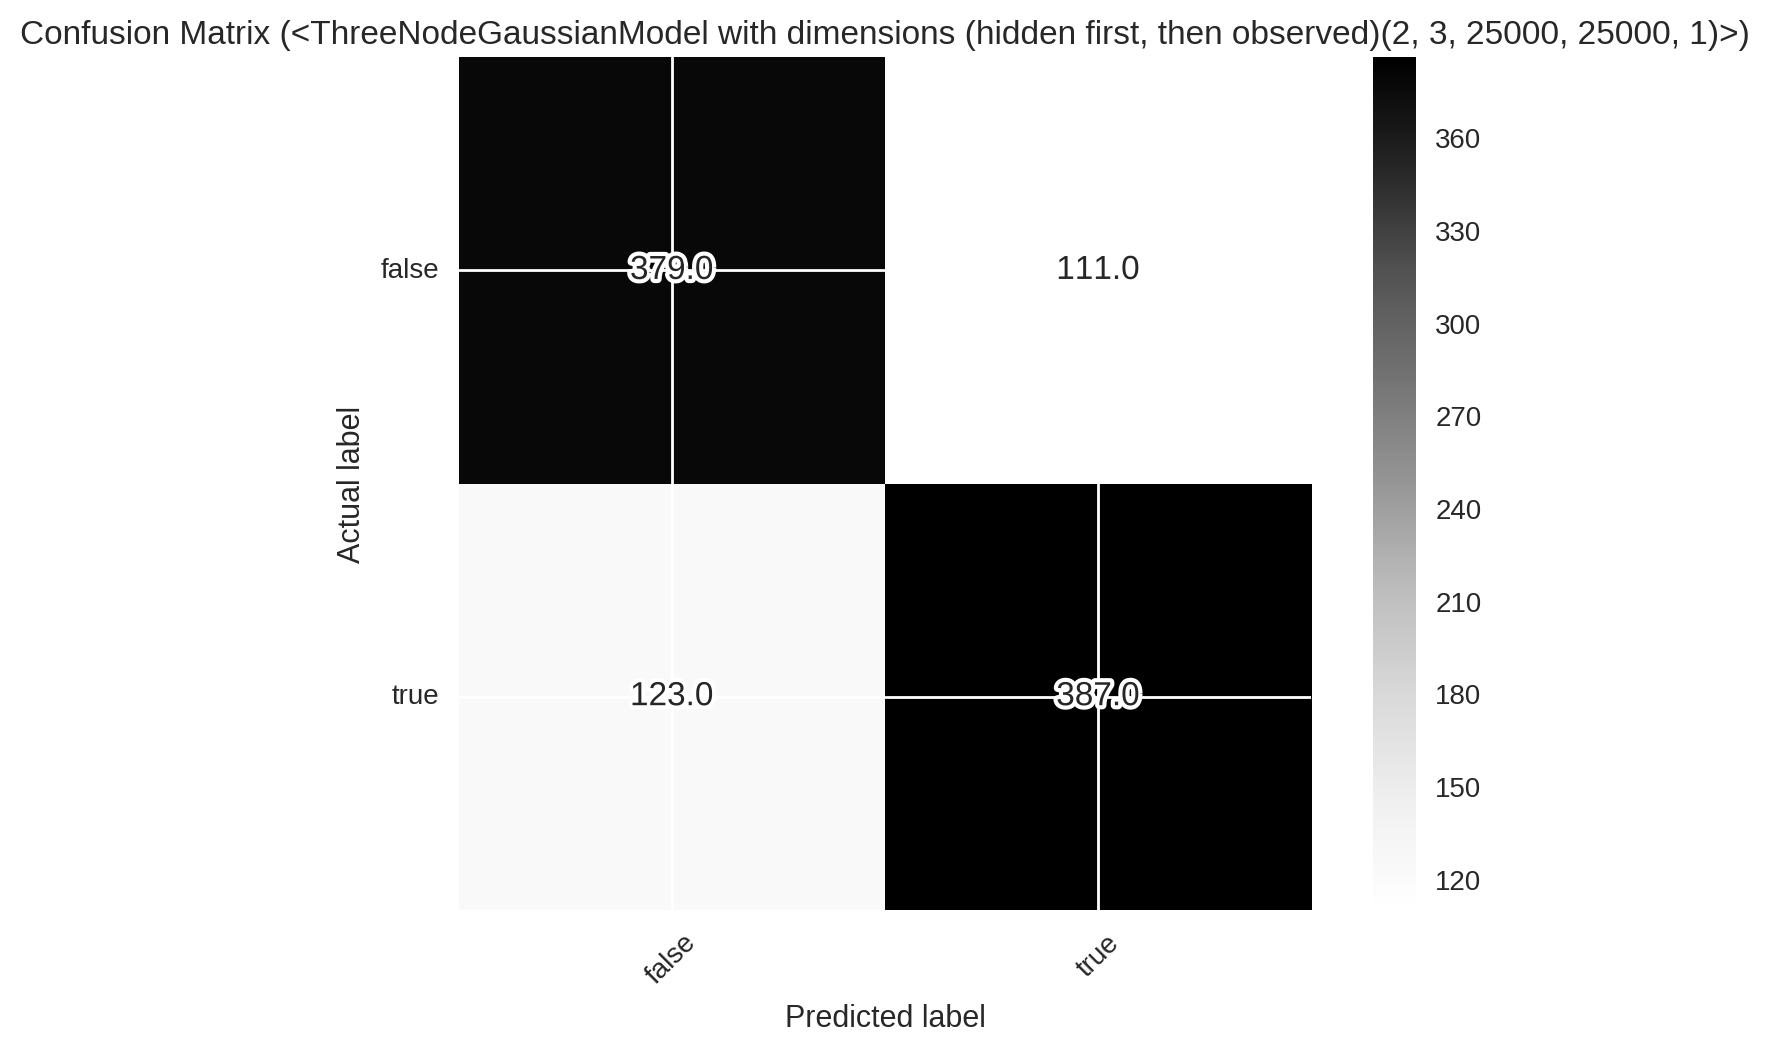

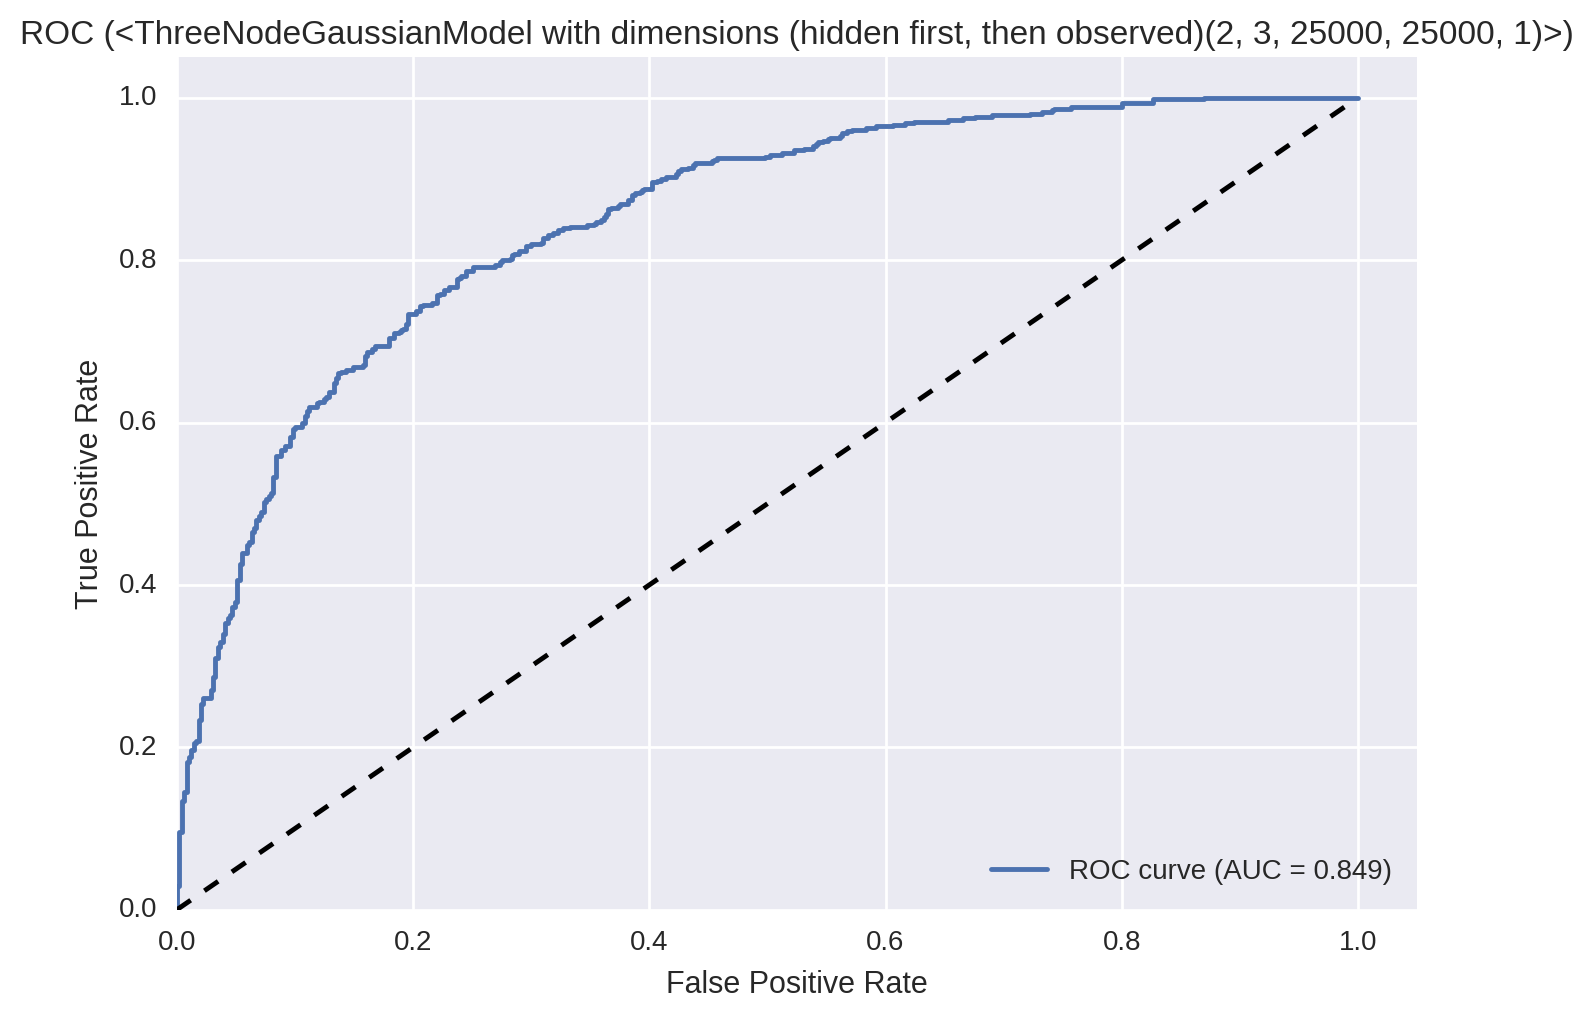

In [18]:
cv_mfaa.output_results()

In [ ]:
stop_time = datetime.datetime.now()
print "Stopped at", stop_time

In [16]:
print "Elapsed (h:m:s)", stop_time - start_time

Elapsed (h:m:s) 1:34:39.805031


In [17]:
print stop_time

2016-11-06 21:05:05.305504
